In [104]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import seaborn as sns
import warnings

In [105]:
url = "https://raw.githubusercontent.com/IvanVC21/Examen-AI-Lab-School/main/insurance.csv"
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [107]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [108]:
print("Sex: \n",df['sex'].value_counts())
print("Smoker: \n",df['smoker'].value_counts())
print("Region: \n",df['region'].value_counts())

Sex: 
 male      676
female    662
Name: sex, dtype: int64
Smoker: 
 no     1064
yes     274
Name: smoker, dtype: int64
Region: 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [109]:
df2 = pd.get_dummies(df)
print(df2.dtypes)
print(df2.columns)

cols = ['charges','age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']
df2 = df2[cols]
df2.head()

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object
Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


,charges,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,16884.92400,19,27.900,0,1,0,0,1,0,0,0,1
1,1725.55230,18,33.770,1,0,1,1,0,0,0,1,0
2,4449.46200,28,33.000,3,0,1,1,0,0,0,1,0
3,21984.47061,33,22.705,0,0,1,1,0,0,1,0,0
4,3866.85520,32,28.880,0,0,1,1,0,0,1,0,0


In [110]:
df2.describe()

,charges,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,13270.422265,39.207025,30.663397,1.094918,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,12110.011237,14.049960,6.098187,1.205493,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,1121.873900,18.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4740.287150,27.000000,26.296250,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9382.033000,39.000000,30.400000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16639.912515,51.000000,34.693750,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,63770.428010,64.000000,53.130000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Skewness: 1.515880
Kurtosis: 1.606299


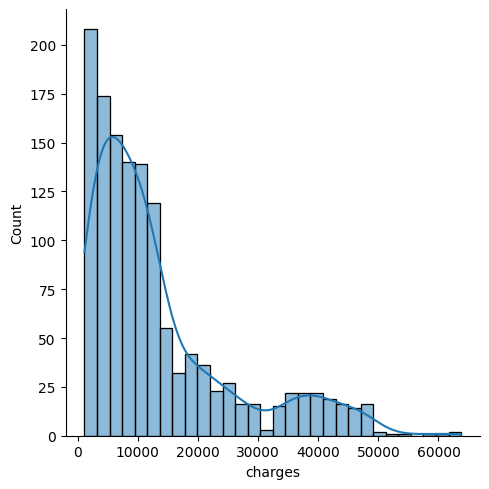

In [111]:
ax = sns.displot((df2['charges']), kde = True)
print("Skewness: %f" % df2['charges'].skew())
print("Kurtosis: %f" % df2['charges'].kurt())

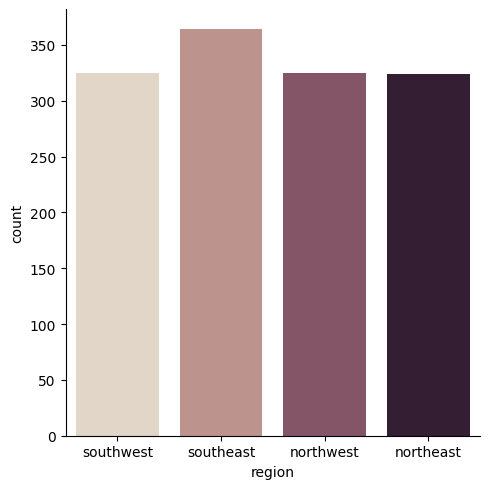

In [112]:
sns.catplot(x= 'region', kind="count", palette="ch:.25", data=df)

Text(0.5, 1.0, 'Cost for smoker/no smoker')

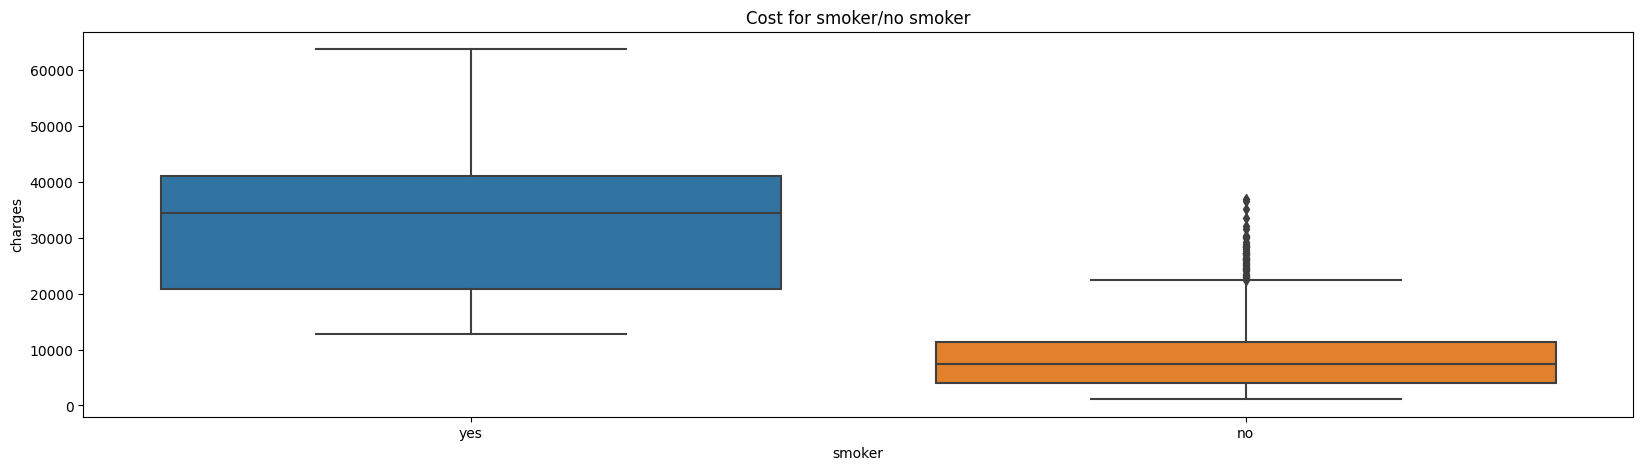

In [113]:
ax = sns.boxplot(x='smoker',y='charges', data = df)
plt.title('Cost for smoker/no smoker')

In [114]:
df2['overweight'] = (df2.bmi >= 30).astype(int)
df2['unhealthy'] = df2.smoker_yes * df2.overweight

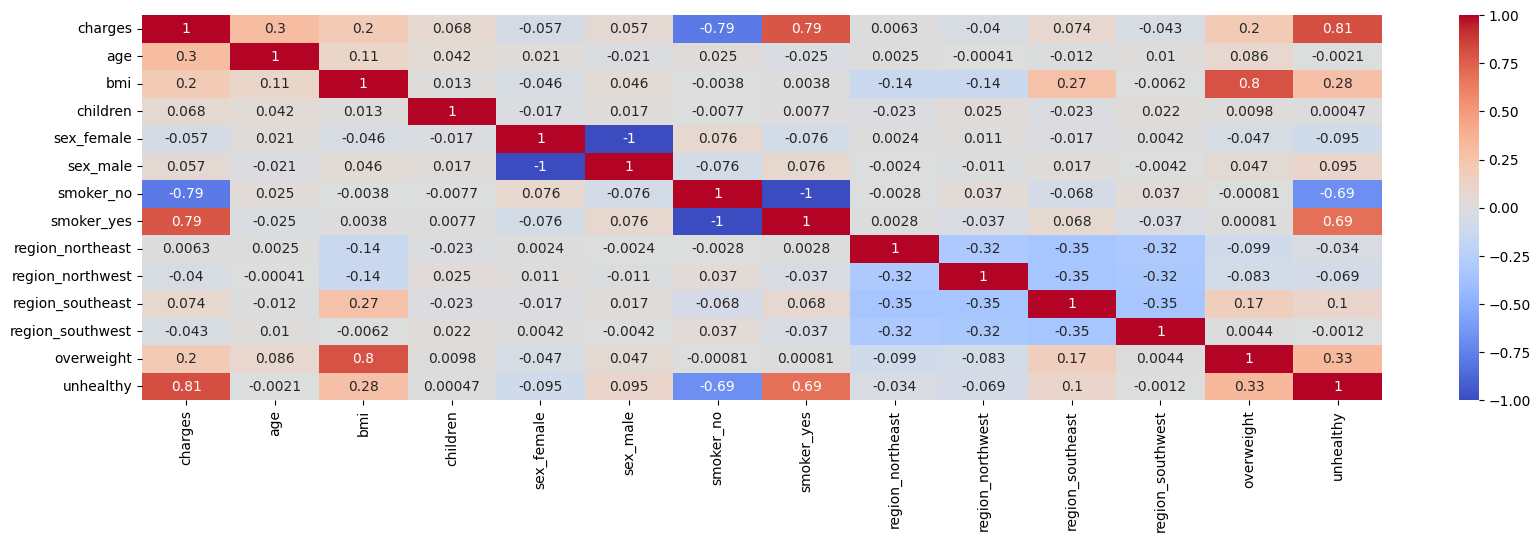

In [115]:
plt.rcParams['figure.figsize'] = (20, 5)
sns.heatmap(df2.corr(), cmap = 'coolwarm', annot = True)

plt.show()

In [116]:
max_threshold = df2['charges'].quantile(0.95)
min_threshold = df2['charges'].quantile(0.05)

df2 = df2[(df.charges < max_threshold) & (df2.charges > min_threshold)]
df2.shape

(1204, 14)

In [117]:
x = df2[['age', 'children', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southwest',
       'region_southeast', 'overweight', 'unhealthy']]
y = df2[['charges']]

In [118]:
from sklearn.model_selection import train_test_split


x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.33, random_state=42)


In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_val_scaled = sc.transform(x_val)
x_test_scaled = sc.transform(x_test)

In [120]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lasso = linear_model.Lasso()
print("Lasso regression score: ", np.round(np.mean(cross_val_score(lasso, x_train_scaled, y_train, cv = 5, scoring = 'neg_mean_squared_error')), 5))

ridge = linear_model.Ridge()
print("Ridge regression score: ", np.round(np.mean(cross_val_score(ridge, x_train_scaled, y_train, cv = 5, scoring = 'neg_mean_squared_error')), 5))

import xgboost
xgb_reg = xgboost.XGBRegressor()
np.mean(cross_val_score(xgb_reg, x_train_scaled, y_train, cv = 5, scoring = 'neg_mean_squared_error'))
print("XGBoost regression score: ", np.round(np.mean(cross_val_score(xgb_reg, x_train_scaled, y_train, cv = 5, scoring = 'neg_mean_squared_error')), 5))

Lasso regression score:  -20410373.16363
Ridge regression score:  -20408547.66057
XGBoost regression score:  -31376412.91903


In [131]:
import tensorflow as tf
from tensorflow import keras  

red_neuronal = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(9,)),
    keras.layers.Dense(6
                       , activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
red_neuronal.compile(optimizer='adam', loss='mse')

# Train the model with validation and record the training loss
history = red_neuronal.fit(x_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(x_val_scaled, y_val))

Epoch 1/100
18/18 [==============================] - 3s 16ms/step - loss: 215139296.0000 - val_loss: 268866528.0000
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 215129728.0000 - val_loss: 268853696.0000
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 215117648.0000 - val_loss: 268836832.0000
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 215101904.0000 - val_loss: 268816480.0000
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 215082864.0000 - val_loss: 268791328.0000
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 215059360.0000 - val_loss: 268760736.0000
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 215030464.0000 - val_loss: 268722720.0000
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 214995696.0000 - val_loss: 268674752.0000
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 214951

In [122]:
lasso.fit(x_train_scaled, y_train)
ridge.fit(x_train_scaled, y_train)
xgb_reg.fit(x_train_scaled, y_train)

lasso_yhat  = lasso.predict(x_test_scaled)
ridge_yhat = ridge.predict(x_test_scaled)
xgb_yhat = xgb_reg.predict(x_test_scaled)

In [132]:

from sklearn.metrics import mean_squared_error

print("Lasso regression accuracy: %.2f" % mean_squared_error(y_test, lasso_yhat) )
print("Ridge regression accuracy: %.2f" % mean_squared_error(y_test, ridge_yhat) )
print("XGBoost regression accuracy: %.2f" % mean_squared_error(y_test, xgb_yhat) )
print("Neural net regression accuracy: %.2f" % red_neuronal.evaluate(x_test_scaled, y_test))

Lasso regression accuracy: 20877653.10
Ridge regression accuracy: 20875133.23
XGBoost regression accuracy: 36774670.51
12/12 [==============================] - 0s 2ms/step - loss: 95965424.0000
Neural net regression accuracy: 95965424.00


In [124]:
!pip install neptune-client neptune-xgboost neptune-optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [125]:
import neptune

# Initialize Neptune
run = neptune.init_run(project="ivanv21/AI-Lab-School-Examen-Parte2",
                   api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJlN2NhNmY0YS00MjY3LTQ5MGUtOWY3OC1iM2VmNzZhMmQ2MjUifQ==")


https://app.neptune.ai/ivanv21/AI-Lab-School-Examen-Parte2/e/AIL2-6


In [126]:
from sklearn.linear_model import Lasso
def objective(trial):
  
    alpha = trial.suggest_float("alpha", 1e-8, 1.0)
    max_iter = trial.suggest_int("max_iter", 100, 1000)
    tol = trial.suggest_float("tol", 1e-8, 1e-1)

    
    model = Lasso(alpha=alpha, max_iter=max_iter, tol=tol)

    model.fit(x_train_scaled, y_train)

    
    y_pred = model.predict(x_val_scaled)

    mse = mean_squared_error(y_val, y_pred)

    return mse

In [127]:
import optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=500)

print("Best set of hyperparameters: {}".format(study.best_params))

[I 2023-04-24 22:48:37,284] A new study created in memory with name: no-name-429fe8d8-4e6e-4b08-880b-7a5991eebd6d
[I 2023-04-24 22:48:37,300] Trial 0 finished with value: 22394771.400230482 and parameters: {'alpha': 0.9136678187588615, 'max_iter': 141, 'tol': 0.04564267606093295}. Best is trial 0 with value: 22394771.400230482.
[I 2023-04-24 22:48:37,307] Trial 1 finished with value: 22392946.94709803 and parameters: {'alpha': 0.6569786746247457, 'max_iter': 426, 'tol': 0.03672393553575102}. Best is trial 1 with value: 22392946.94709803.
[I 2023-04-24 22:48:37,316] Trial 2 finished with value: 22392129.465477154 and parameters: {'alpha': 0.3718876580686628, 'max_iter': 111, 'tol': 0.008696499474517285}. Best is trial 2 with value: 22392129.465477154.
[I 2023-04-24 22:48:37,328] Trial 3 finished with value: 22392864.365499116 and parameters: {'alpha': 0.41049110648332343, 'max_iter': 512, 'tol': 0.0722247119781536}. Best is trial 2 with value: 22392129.465477154.
[I 2023-04-24 22:48:37,

Best set of hyperparameters: {'alpha': 4.904557671914336e-06, 'max_iter': 225, 'tol': 0.08068438157310666}


In [128]:
best_params = study.best_params
best_mse = study.best_value

run['best_params'] = best_params
run['best_mse'] = best_mse

run.stop()

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 4 operations to synchronize with Neptune. Do not kill this process.
All 4 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/ivanv21/AI-Lab-School-Examen-Parte2/e/AIL2-6/metadata


In [129]:


lasso_opt = Lasso(**best_params)
lasso_opt.fit(x_train, y_train)

Lasso(alpha=4.904557671914336e-06, max_iter=225, tol=0.08068438157310666)

In [130]:

lasso_opt_yhat = lasso_opt.predict(x_test)

print("Optimized Lasso regression Mean Squared Error score: %.2f" % mean_squared_error(y_test, lasso_opt_yhat))

Optimized Lasso regression Mean Squared Error score: 20878002.23


In [133]:
import pickle
with open('lasso_opt_model.pkl', 'wb') as f:
    pickle.dump(lasso_opt, f)